# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})

# Import code and the pre-built module containing the household
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass() # shorter name for the model class

# Question 1

To solve this problem, I first define the method `calc_home_production` in the model class module. This is the piecewise home production function $H$ as given in the problem description.

In [3]:
# Test cell 1
model.solve_discrete() # note that this returns a SimpleNamespace

namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)

In [4]:
# Test cell 2
model.solve_discrete().LM # access LM from the SimpleNamespace

4.5

Next, I define lists containing the values of $\alpha$ and $\sigma$. Additionaly, an empty list `ratio_home_list` is initiialized. Using nested loops, I solve the model using the method `solve_discrete()` from the model class while looping over the different values of $\alpha$ and $\sigma$. For each iteration, the ratio $\frac{H_F}{H_M}$ is computed and printed. Furthermore, the ratio is appended to the list `ratio_home_list`.

In [5]:
# Solution to question 1

alpha_list = [0.25, 0.50, 0.75] # list of values of alpha
sigma_list = [0.5, 1.0, 1.5] # list of values of sigma

ratio_home_list = [] # initialize empty list

# solve the model while looping over the lists containing alpha and sigma values
for i in alpha_list:
    model.par.alpha = i
    for j in sigma_list:
        model.par.sigma = j
        result = model.solve_discrete() # solves model and saves the resulting SimpleNamespace as result
        ratio_home = result.HF/result.HM # computes ratio
        ratio_home_list.append(ratio_home) # append the empty list with ratio_home
        print(f'For alpha = {i:.2f} and sigma = {j:.1f} the ratio is HF/HM = {ratio_home:.5f}.') # print line for each iteration

# print list of ratios
# print(f'List of ratios: {ratio_home_list}')

c:\Users\hchaa\OneDrive - University of Copenhagen\Repositories\Intro to Programming and Numerical Analysis\projects-2023-snakecity\inauguralproject\HouseholdSpecializationModel.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  return ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


For alpha = 0.25 and sigma = 0.5 the ratio is HF/HM = 0.54545.
For alpha = 0.25 and sigma = 1.0 the ratio is HF/HM = 0.30769.
For alpha = 0.25 and sigma = 1.5 the ratio is HF/HM = 0.21429.
For alpha = 0.50 and sigma = 0.5 the ratio is HF/HM = 1.00000.
For alpha = 0.50 and sigma = 1.0 the ratio is HF/HM = 1.00000.
For alpha = 0.50 and sigma = 1.5 the ratio is HF/HM = 1.00000.
For alpha = 0.75 and sigma = 0.5 the ratio is HF/HM = 1.83333.
For alpha = 0.75 and sigma = 1.0 the ratio is HF/HM = 3.25000.
For alpha = 0.75 and sigma = 1.5 the ratio is HF/HM = 4.66667.


# Question 2

First, $\alpha$ and $\sigma$ are set to their baseline values. Next, an empty plot figure is created. To plot $\log\frac{H_F}{H_M}$ against $\log\frac{W_F}{W_M}$, the model is solved while iterating over the five different values of $W_F$. For each iteration, the results are plotted.

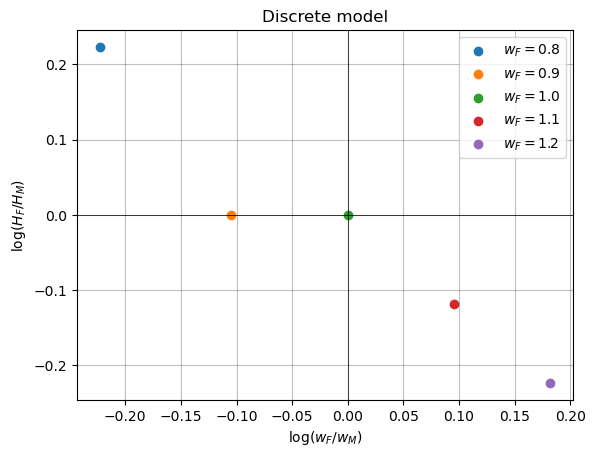

In [6]:
# Solution to question 2

# household parameters are set to their baseline values again.
model.par.alpha = 0.50
model.par.sigma = 1.0

# create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# while iterating through vector of females wages, solve model and plot
for i in model.par.wF_vec: # this vector contains the 5 different values of wF
    model.par.wF = i
    result = model.solve_discrete() # solves model and saves the resulting SimpleNamespace as result
    ratio_home_log = np.log(result.HF/result.HM) 
    ratio_wage_log = np.log(i/model.par.wM)
    ax.scatter(ratio_wage_log,ratio_home_log,label=f'$w_F={i}$') # for each iteration, make plot

ax.set_title('Discrete model') # title of plot
ax.set_xlabel('$\log (w_F/w_M)$') # label on x-axis
ax.set_ylabel('$\log (H_F/H_M)$') # label on y-axis
ax.legend(loc='upper right'); # activates legend
plt.axhline(0, color='black', linewidth=.5) # emphasizes x-axis
plt.axvline(0, color='black', linewidth=.5) # emphasizes y-axis
    


# Question 3

To solve the model continuously, the method `solve_continuous` is implemented in the model class. This method makes use of scipy's `optimize.minimize` method, which is used to minimize the objective function (the utility function) subject to constraints and bounds. This is done iteratively for all the values in the $W_F$ vector. The solutions are plotted in the graph below.

In [7]:
# Test cell 1
model.solve_continuous() # note that this returns a SimpleNamespace

namespace(LM=3.130587838251813,
          HM=4.8086420484294266,
          LF=5.508682305041774,
          HF=3.9899889754102196)

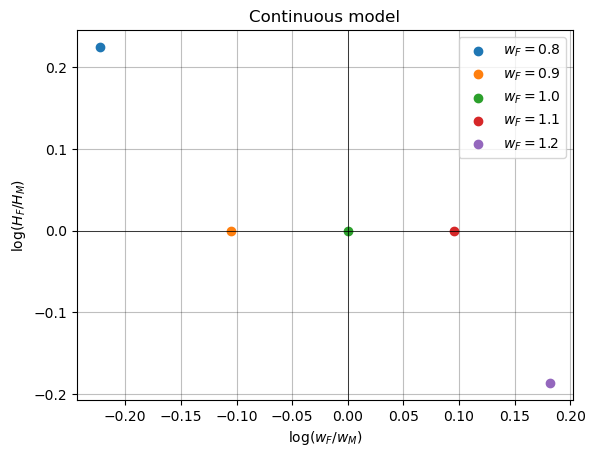

In [8]:
# Question 3

# create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# while iterating through vector of females wages, solve model and plot
for i in model.par.wF_vec: # this vector contains the 5 different values of wF
    model.par.wF = i
    result = model.solve_continuous() # solves model and saves the resulting SimpleNamespace as result
    ratio_home_log = np.log(result.HF/result.HM) 
    ratio_wage_log = np.log(i/model.par.wM)
    ax.scatter(ratio_wage_log, ratio_home_log,label=f'$w_F={i}$') # for each iteration, make plot

ax.set_title('Continuous model') # title of plot
ax.set_xlabel('$\log (w_F/w_M)$') # label on x-axis
ax.set_ylabel('$\log (H_F/H_M)$') # label on y-axis
ax.legend(loc='upper right'); # activates legend
plt.axhline(0, color='black', linewidth=.5) # emphasizes x-axis
plt.axvline(0, color='black', linewidth=.5) # emphasizes y-axis

**Idea for revision of assignment**: Investigate whether the specification of the bounds causes discontinuities (perhaps lower bound must be set to some small number, e.g. $1.0\cdot 10^{-8}$). 

# Question 4

In this question, a regression is done on the results from the continuous model using the method `run_regression` from the model class. Next, the method `estimate` is implemented in the model class, which finds the values of $\alpha$ and $\sigma$ that minimize the given sum of squares.

In [14]:
model.run_regression() # test of regression method

namespace(LM_vec=array([5.56719379, 4.5172855 , 4.46018697, 4.39550243, 3.4956546 ]),
          HM_vec=array([4.44431146, 4.49164707, 4.46018738, 4.41788162, 4.41151483]),
          LF_vec=array([3.41239317, 4.46638409, 4.46018697, 4.43984974, 5.21552547]),
          HF_vec=array([4.56532288, 4.49207198, 4.46018738, 4.41750887, 4.31848796]),
          beta0=0.00013733066536022014,
          beta1=-0.09582916985026363,
          x=array([-0.22314355, -0.10536052,  0.        ,  0.09531018,  0.18232156]),
          y=array([ 2.68642867e-02,  9.45951051e-05,  8.88178420e-16, -8.43769917e-05,
                   -2.13127983e-02]))

In [10]:
model.estimate() # the values of alpha and sigma that minimize the sum of squares are computed

c:\Users\hchaa\OneDrive - University of Copenhagen\Repositories\Intro to Programming and Numerical Analysis\projects-2023-snakecity\inauguralproject\HouseholdSpecializationModel.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  return ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


(0.8578947368421053, 0.2, 6.216872455065948, -0.9710093650130565)

In [11]:
print(f'(alpha,sigma)=({model.par.alpha},{model.par.sigma})') # prints the found values of alpha and sigma in a tuple.

(alpha,sigma)=(0.8578947368421053,0.2)


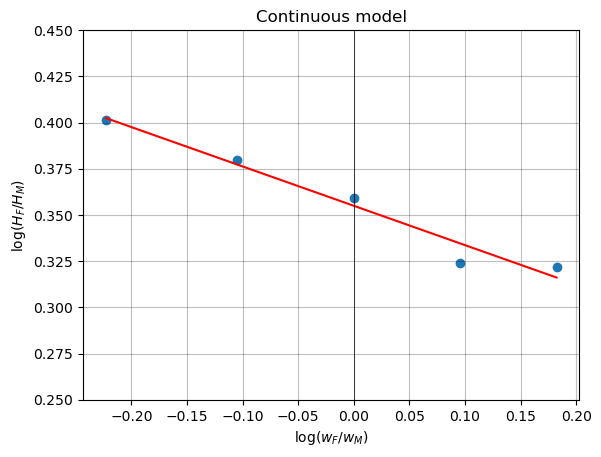

In [12]:
# create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(model.run_regression().x, model.run_regression().y)

# define the regression line
intercept = model.run_regression().beta0
slope = model.run_regression().beta1
regression_x = model.run_regression().x
regression_y = intercept + slope*model.run_regression().x

plt.plot(regression_x, regression_y, color='red') # regression line

ax.set_title('Continuous model') # title of plot
ax.set_xlabel('$\log (w_F/w_M)$') # label on x-axis
ax.set_ylabel('$\log (H_F/H_M)$') # label on y-axis
plt.ylim(0.25, 0.45) # range on y axis
plt.axhline(0, color='black', linewidth=.5) # emphasizes x-axis
plt.axvline(0, color='black', linewidth=.5) # emphasizes y-axis

 The regression line shows that the larger the ratio between female wage and male wage, the less hours the female works at home, cet. par. The economic interpretation is intuitive: as the opportunity cost of working at home increases for the female, i.e. as the female's wage increases, the less time is spent on working at home.

# Question 5

No extension is made to the model: $\alpha$ is set to 0.5. Otherwise the same as Question 4.

(alpha,sigma)=(0.5,0.2727272727272727)


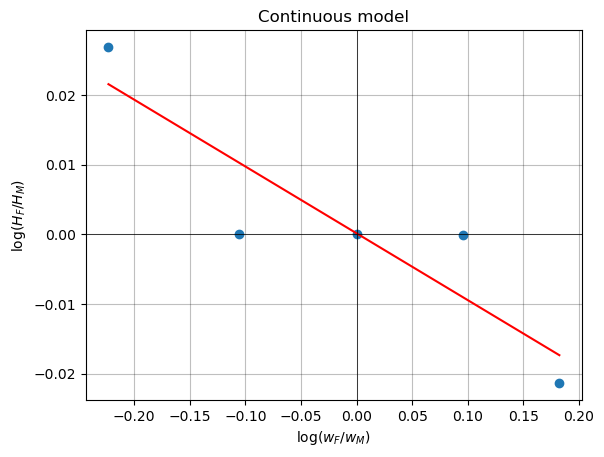

In [15]:
model.estimate_sigma()

print(f'(alpha,sigma)=({model.par.alpha},{model.par.sigma})')

# create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(model.run_regression().x, model.run_regression().y)

# define the regression line
intercept = model.run_regression().beta0
slope = model.run_regression().beta1
regression_x = model.run_regression().x
regression_y = intercept + slope*model.run_regression().x

plt.plot(regression_x, regression_y, color='red') # regression line

ax.set_title('Continuous model') # title of plot
ax.set_xlabel('$\log (w_F/w_M)$') # label on x-axis
ax.set_ylabel('$\log (H_F/H_M)$') # label on y-axis
# plt.ylim(0.25, 0.45) # range on y axis
plt.axhline(0, color='black', linewidth=.5) # emphasizes x-axis
plt.axvline(0, color='black', linewidth=.5) # emphasizes y-axis

**Idea for revision of assignment**: Extend the theoretical model in some way.